# Numerical features
Here we will explore those numerical features one by one except "Id".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
import json
warnings.filterwarnings('ignore')

In [2]:
training = "../../data/train.csv"
test = "../../data/test.csv"

In [3]:
df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

In [4]:
num = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]

In [5]:
num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's see the heatmap for the correlation as a rough exploration.

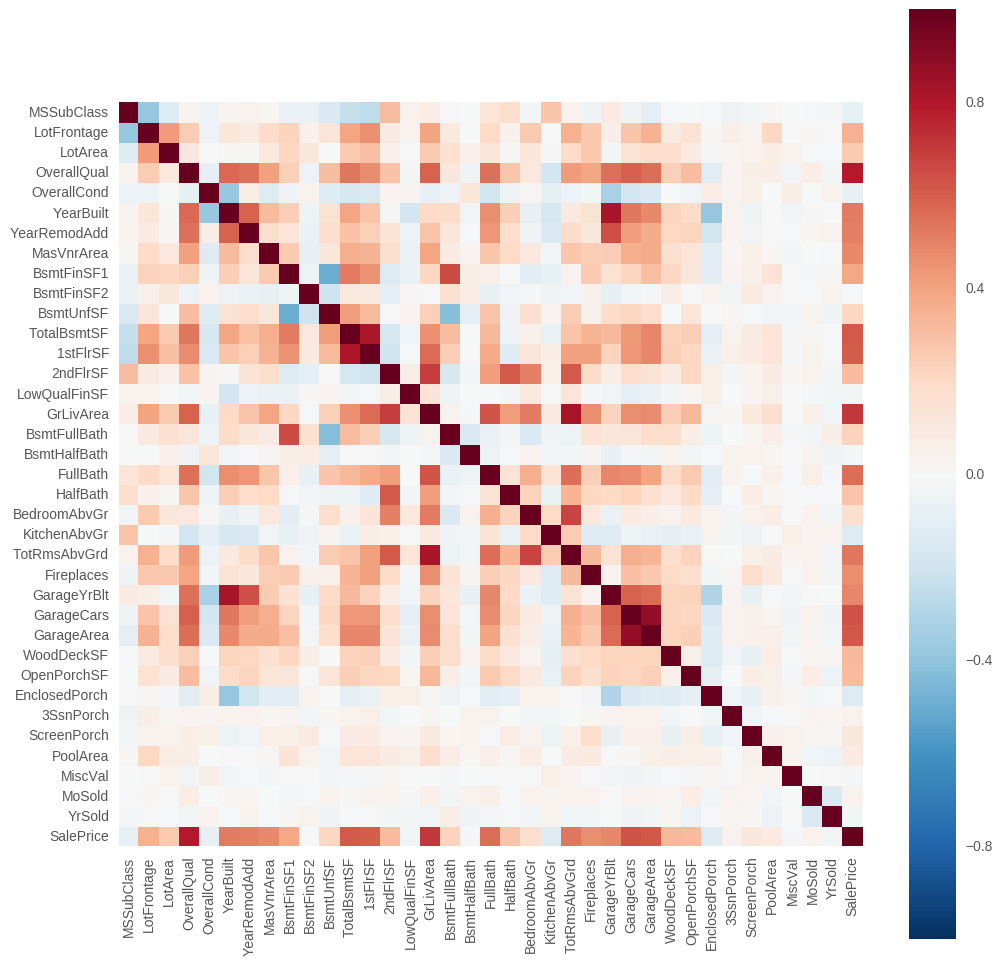

In [6]:
corr = num.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=1, square=True)

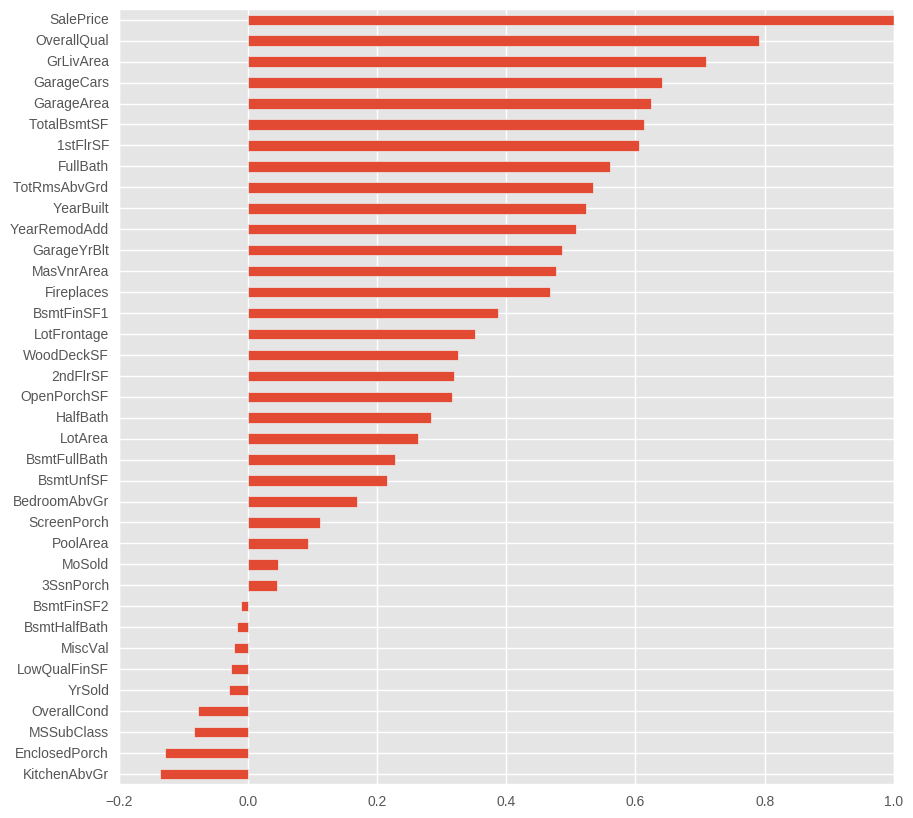

In [7]:
Price_corr = corr["SalePrice"].sort_values()
Price_corr.plot.barh(figsize=(10,10))

We can drop `KitchenAbrGr`, `YrSold`, `MoSold` and `OverallCond` from the correlation with price.

Let's start from "SalePrice" itself to see the distribution.

In [8]:
def plot_univariate_dist(num, column):
    fig = plt.figure(figsize=(8, 6))
    d = sns.distplot(num[column].dropna(), color='r')
    plt.title("Distribution of " + column)
    plt.ylabel("Number of Occurences")
    plt.xlabel(column)

In [9]:
def plot_univariate_pp(num, column):
    fig = plt.figure(figsize=(8, 8))
    plt.text(x=2, y=1,s="Skewness: %f\n Kurtosis: %f" % (num[column].skew(),
                                                     num[column].kurt()) )

    res = st.probplot(num[column], plot=plt)

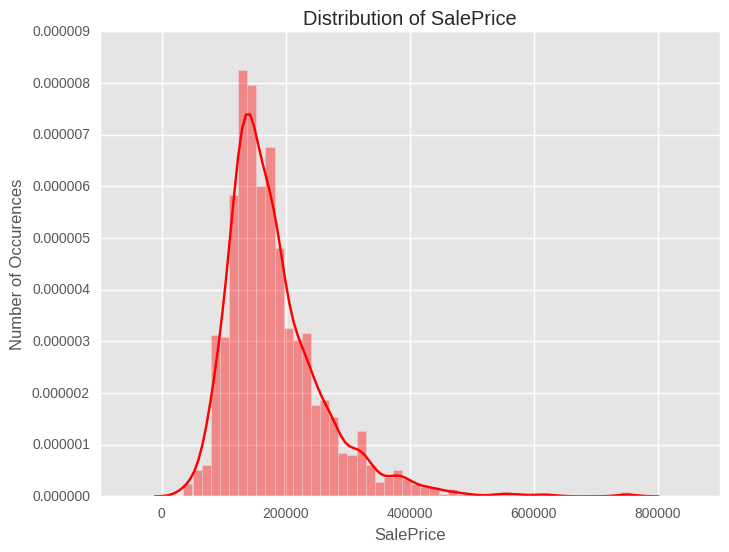

In [10]:
plot_univariate_dist(num, "SalePrice")

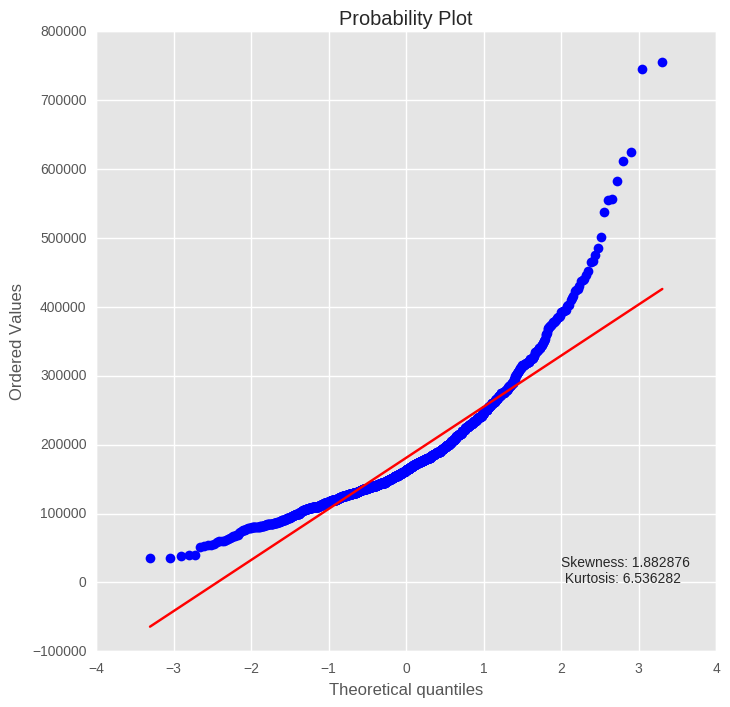

In [11]:
plot_univariate_pp(num, "SalePrice")

From probability plot and skewness and kurtosis test, one can find `SalePrice` is peakness and postive skewness, therefore the log transformations can solve the issue. 

# OverallQual
From definition, it is the rates for the overall material and finish of the house. It can cover the general impression of the house, it should be a very important feature for the prediction. And `OverallQual` has high correlations with `SalePrice` and confirms the assumption.

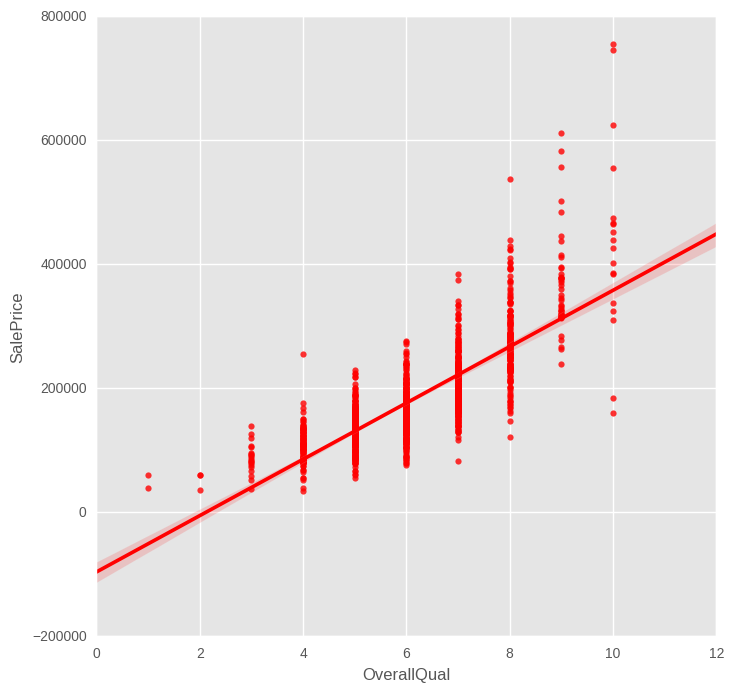

In [12]:
plt.figure(figsize=(8,8))
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = num, color="Red")

It looks like there is a small deviation from the linear regression for a low and high rate, though overall it fits the linear regression very well.

# GrLivArea
From the description, `GrLivArea` is the above grade (ground) living area in square feet, which is a good indicator for the overall of the house. It has the highly correlation with `SalePrice` variable. 

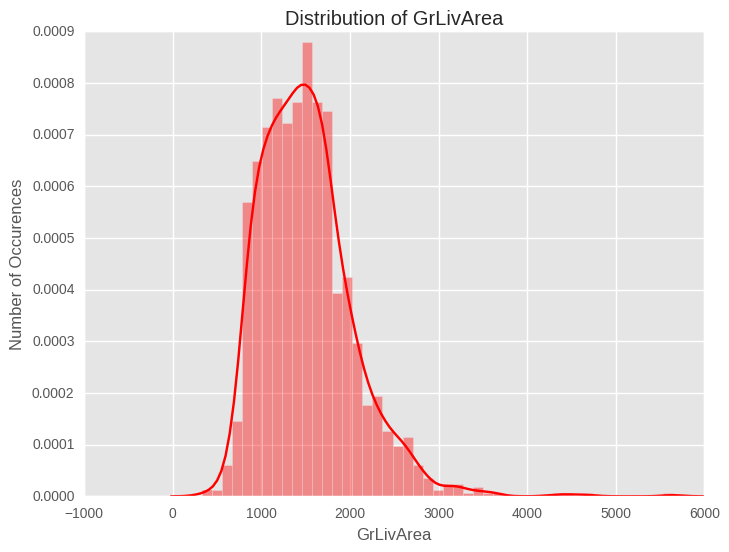

In [13]:
plot_univariate_dist(num, "GrLivArea")

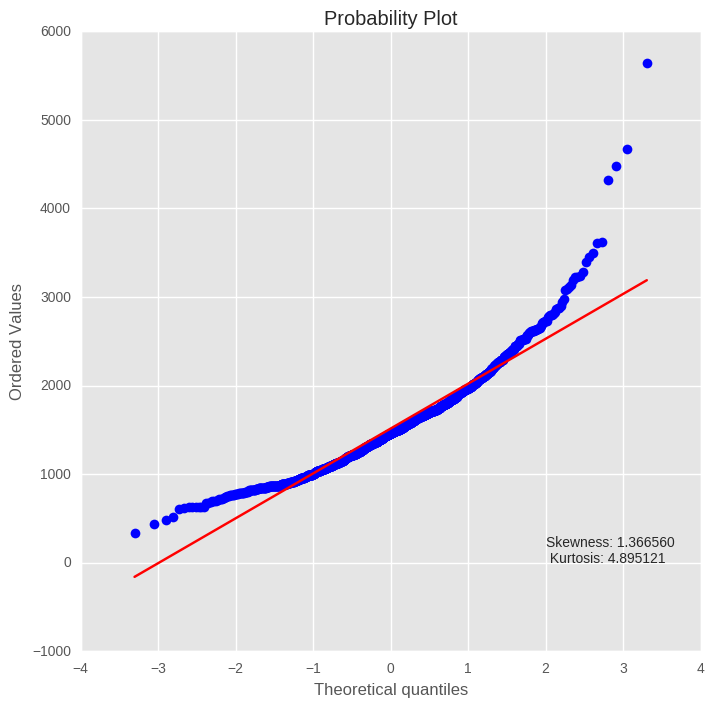

In [14]:
plot_univariate_pp(num, "GrLivArea")

It has Peakness and positive skewness, again log transformations can solve the issue. 

# GarageArea
`GarageArea` is Size of garage in square feet and it has missing values, but we can still plot the distribution to see how it looks. 

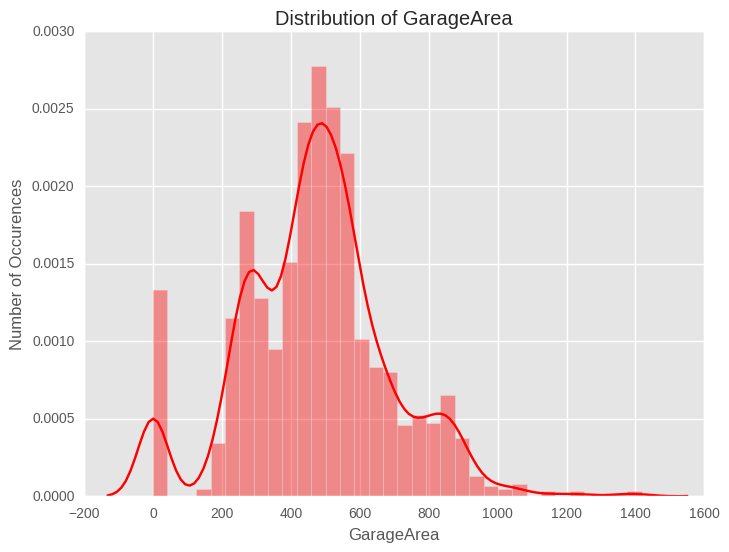

In [15]:
plot_univariate_dist(num, "GarageArea")

An interesting observation is that there are large number of houses have `Zero` GarageArea meaning they don't have garage at all. 

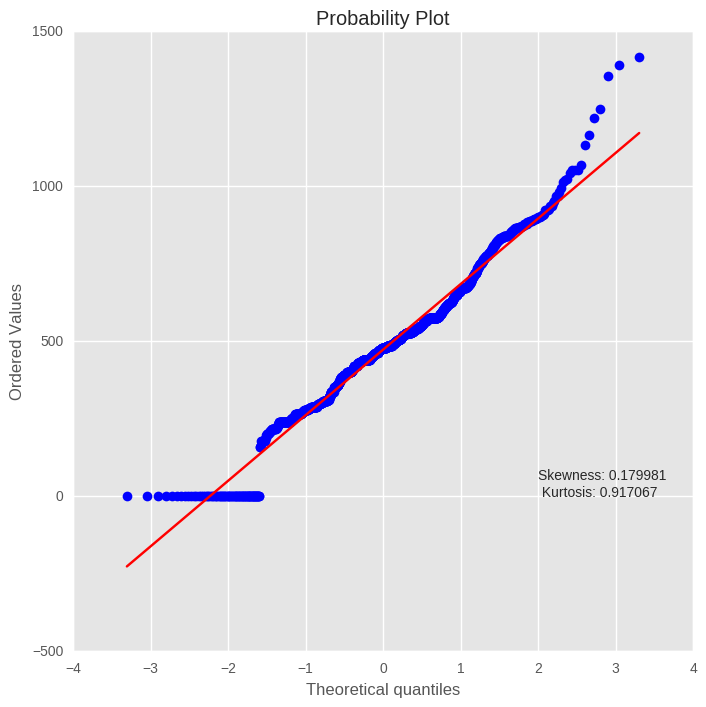

In [16]:
plot_univariate_pp(num, "GarageArea")

From the probability plot, `GarageArea` doesn't need to do any transformation in general. However, how to deal with those zeros could be issues. 

In [17]:
num["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

# GarageCars
From definition,  `GarageCars` is the size of Garage in car capacity, it should be proportinal to `GarageArea`.

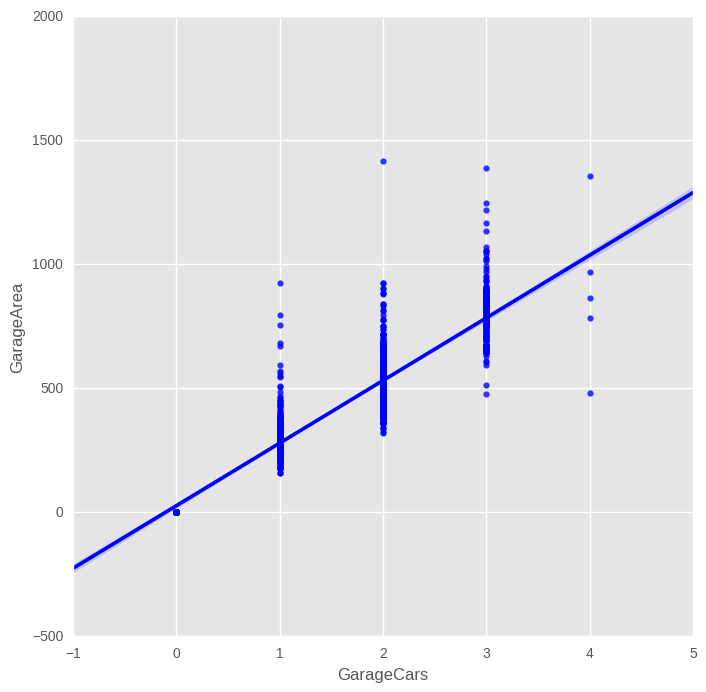

In [18]:
plt.figure(figsize=(8,8))
sns.regplot(x = "GarageCars", y = "GarageArea", data= num, color="blue")

To represent the impact of Garage to the price, only one of these two features are needed. They are the same thing. And some of `GarageArea` is not normal, for example for `GarageCars=2`, `GarageArea` can be larger than when `GarageCars=3`.

# TotalBsmtSF
This varaible compute the total square feet of basement area. It can represent the overall impact of the Basement area on the price.

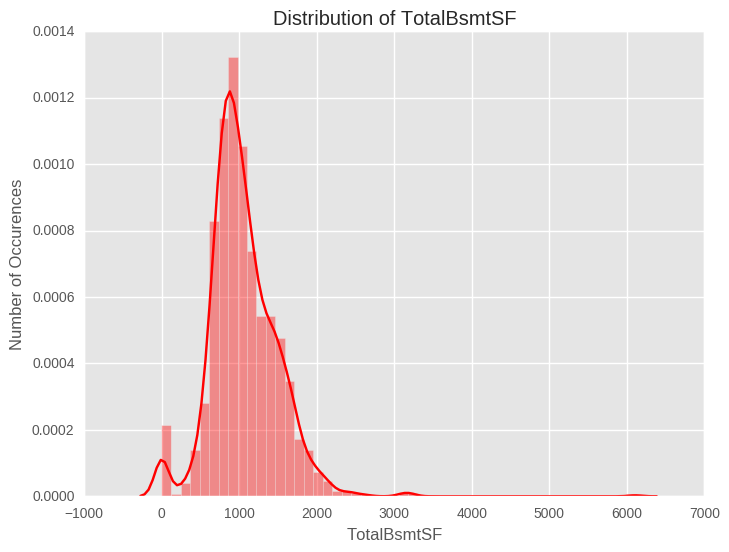

In [19]:
plot_univariate_dist(num, "TotalBsmtSF")

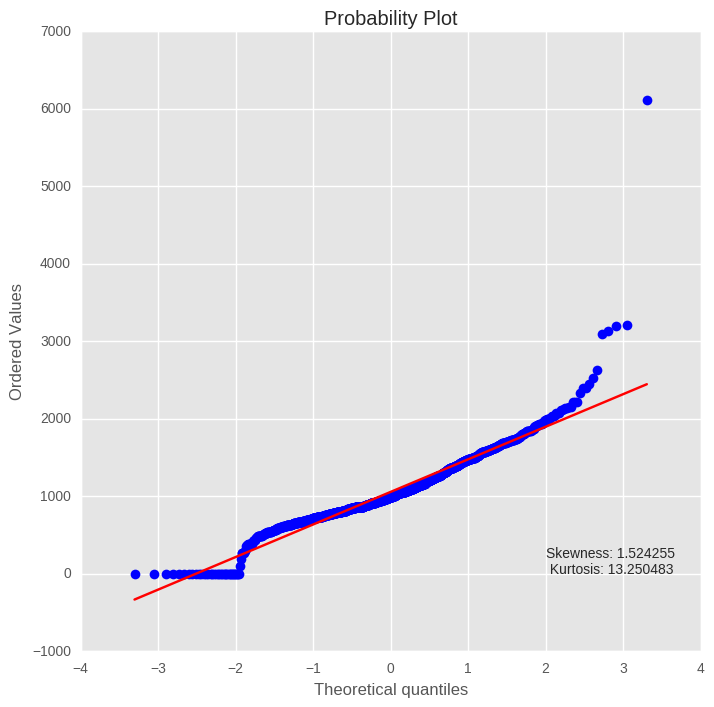

In [20]:
plot_univariate_pp(num, "TotalBsmtSF")

From the distribution and probability plot, there is at least one outlier that can be removed. And again there are a few hourses that don't have Basement. 

# BsmtFinSF1
Type 1 finished square feet in basement.

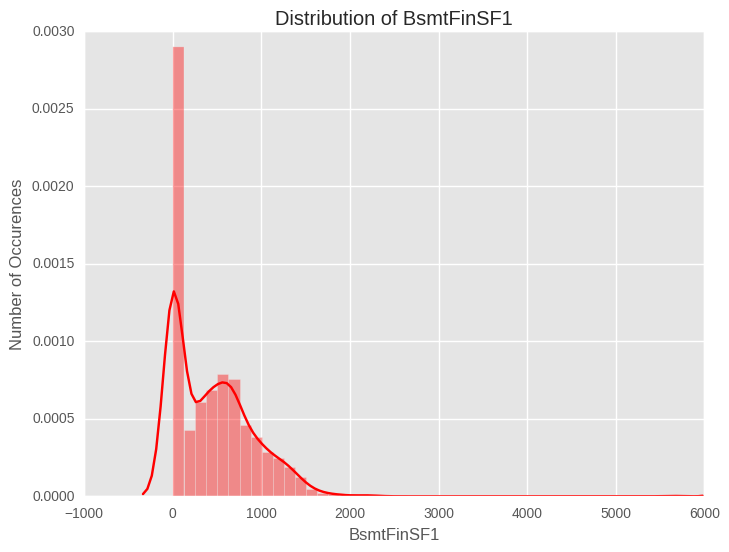

In [21]:
plot_univariate_dist(num, "BsmtFinSF1")

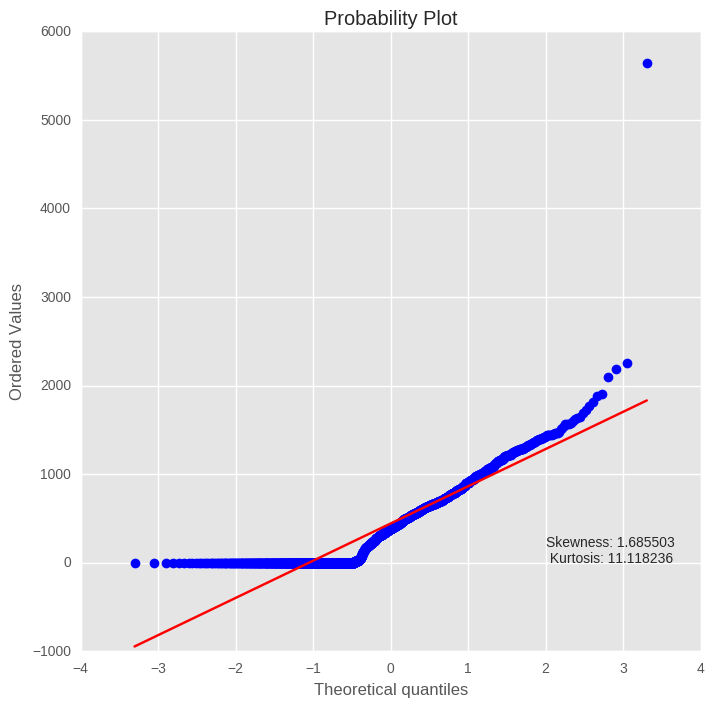

In [22]:
plot_univariate_pp(num, "BsmtFinSF1")

There are a large number of houses don't have finished basement, consider dropping.

# BsmtFinSF2
The type 2 finished square feet is not relevent to the house price compared to other basement area.

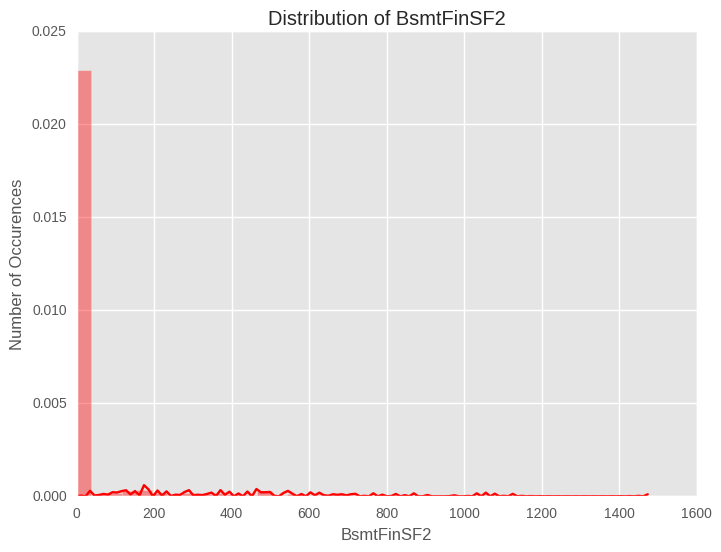

In [23]:
plot_univariate_dist(num, "BsmtFinSF2")

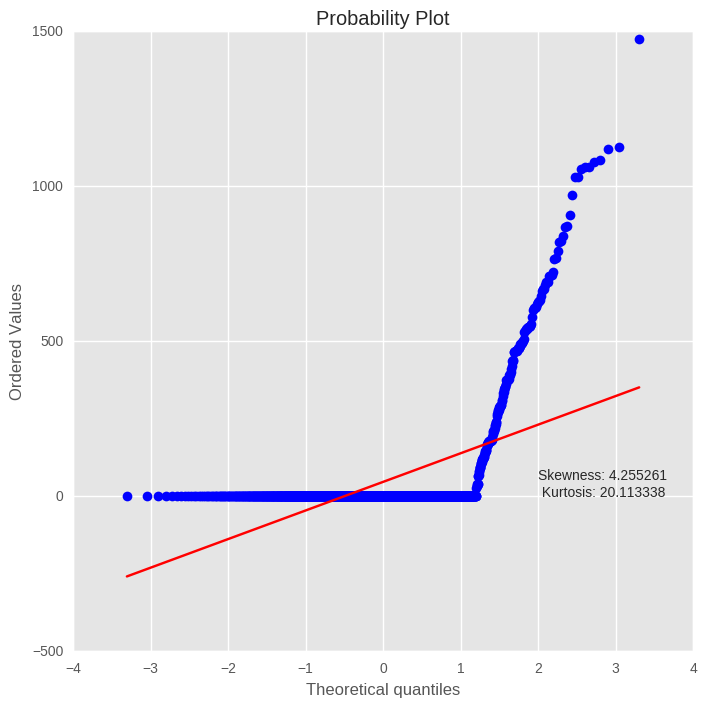

In [24]:
plot_univariate_pp(num, "BsmtFinSF2")

There are a large number of houses that don't have type 2 finished basement. This variable can be considered drop.

# BsmtUnfSF
Unfinished square feet of basement area, not important features.

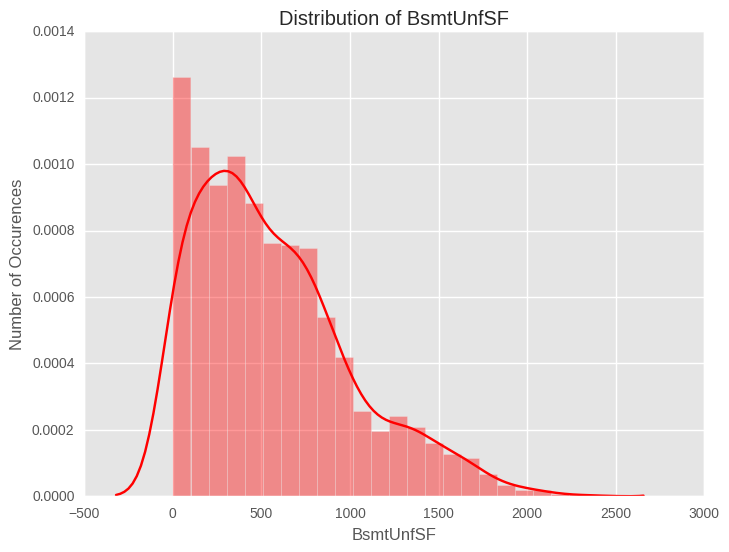

In [25]:
plot_univariate_dist(num, "BsmtUnfSF")

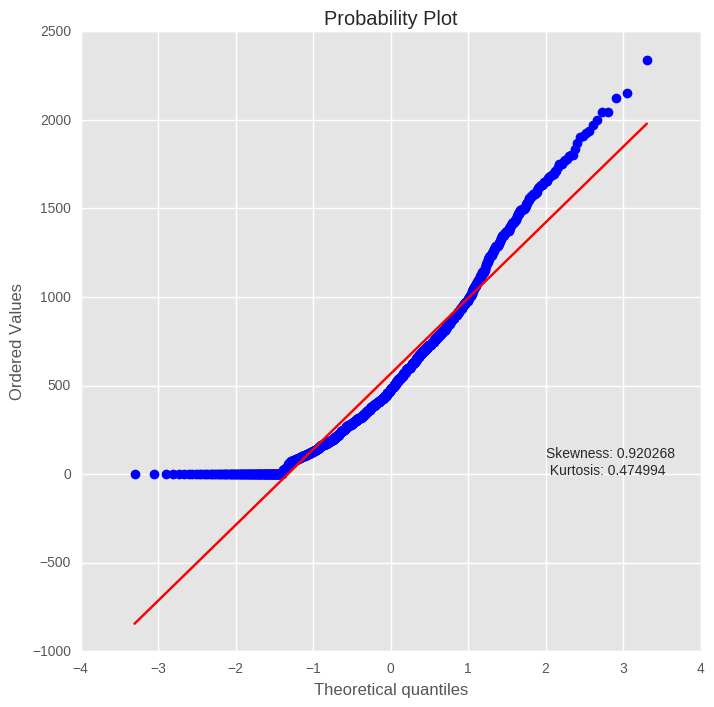

In [26]:
plot_univariate_pp(num, "BsmtUnfSF")

Consider drop the feature

Overall, for Basement features, recommand only keep the total basement area. 

# 1stFlrSF
It is First Floor square feet by definition, which has relative high correlation with the final price.

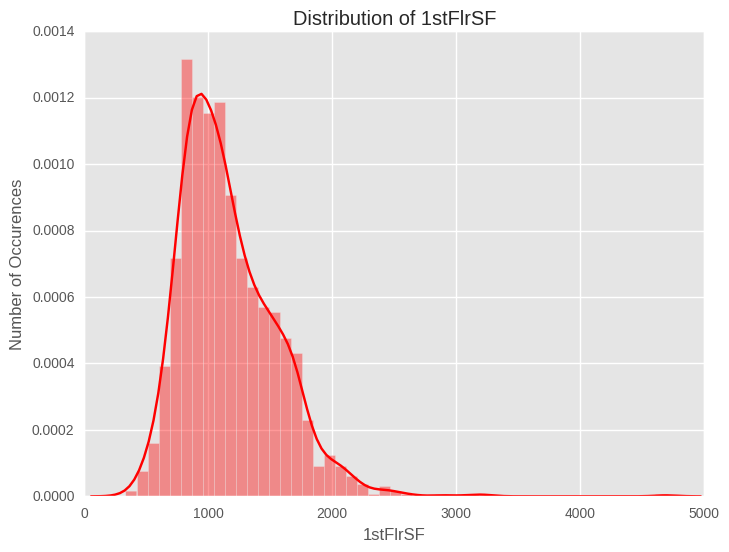

In [27]:
plot_univariate_dist(num, "1stFlrSF")

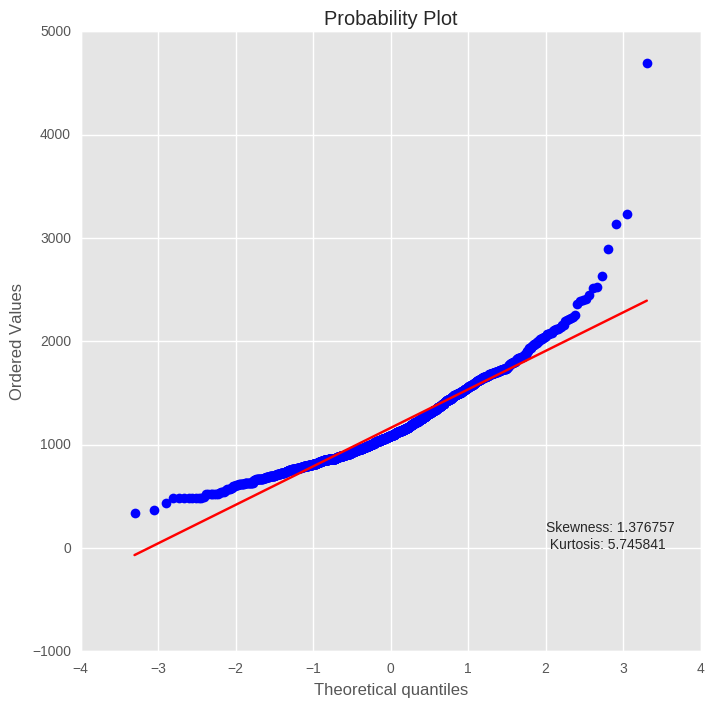

In [28]:
plot_univariate_pp(num, "1stFlrSF")

It may need to do log transformation.

# 2ndFlrSF
Second floor squre feet, it is not that important regarding the house price. It is reasonable, the major rooms are on the first floor in most houses.

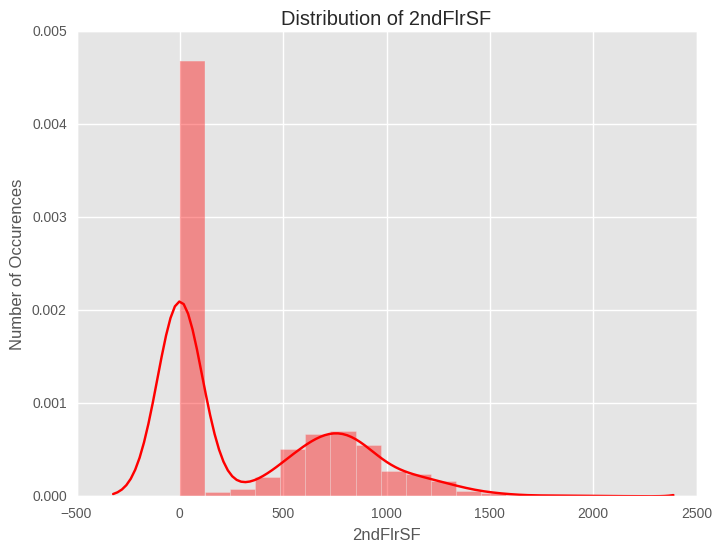

In [29]:
plot_univariate_dist(num, "2ndFlrSF")

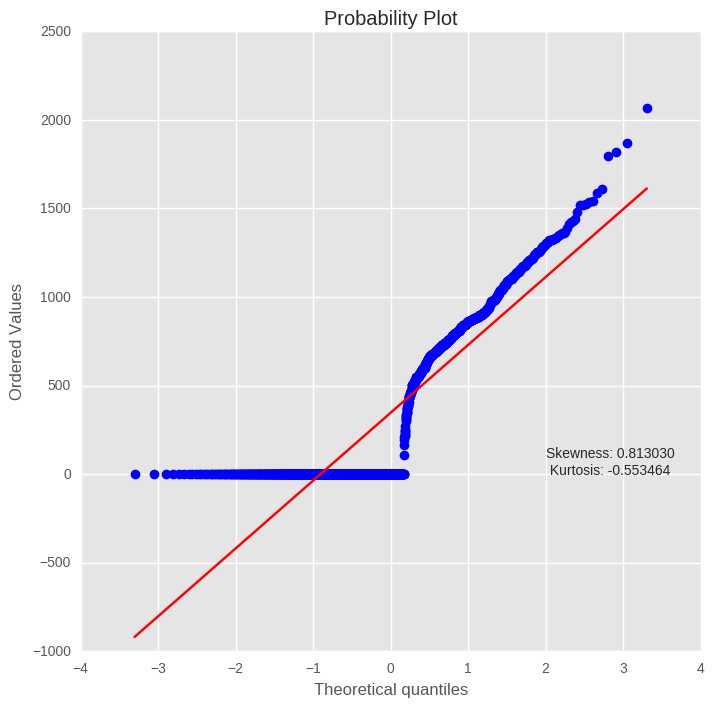

In [30]:
plot_univariate_pp(num, "2ndFlrSF")

For `Floor` features, we can add them together. 

# MasVnrArea
Masonry Veneer area in square feet.

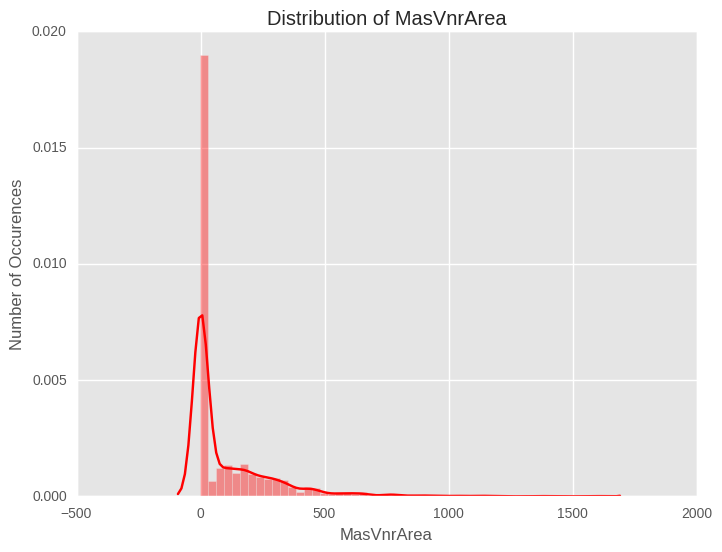

In [31]:
plot_univariate_dist(num, "MasVnrArea")

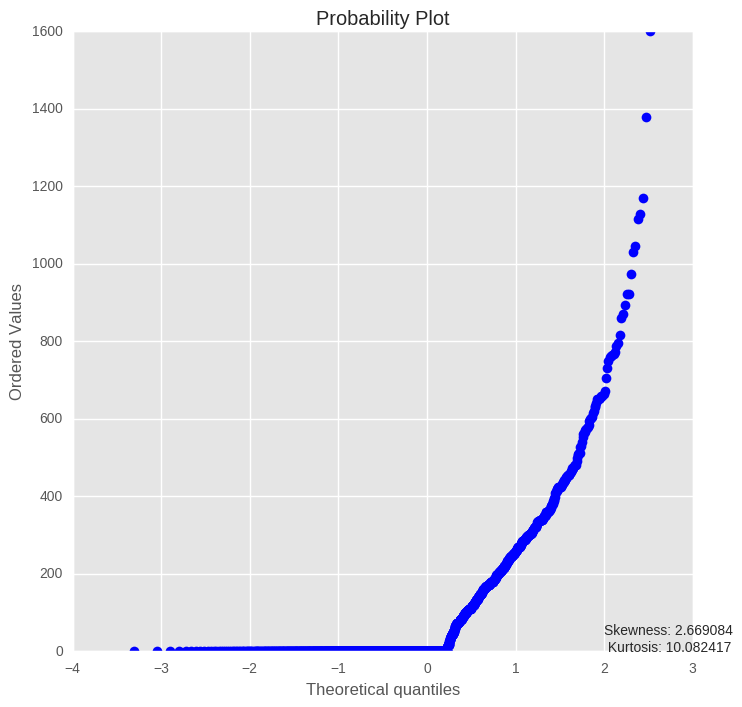

In [32]:
plot_univariate_pp(num, "MasVnrArea")

The majority of the houses have no Masonary Veneer. Consider dropping.

# WoodDeckSF
Wood deck area in square feet.

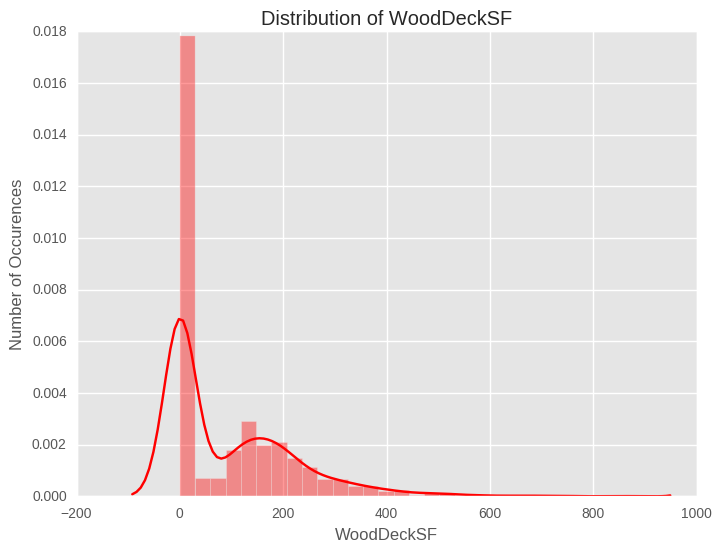

In [33]:
plot_univariate_dist(num, "WoodDeckSF")

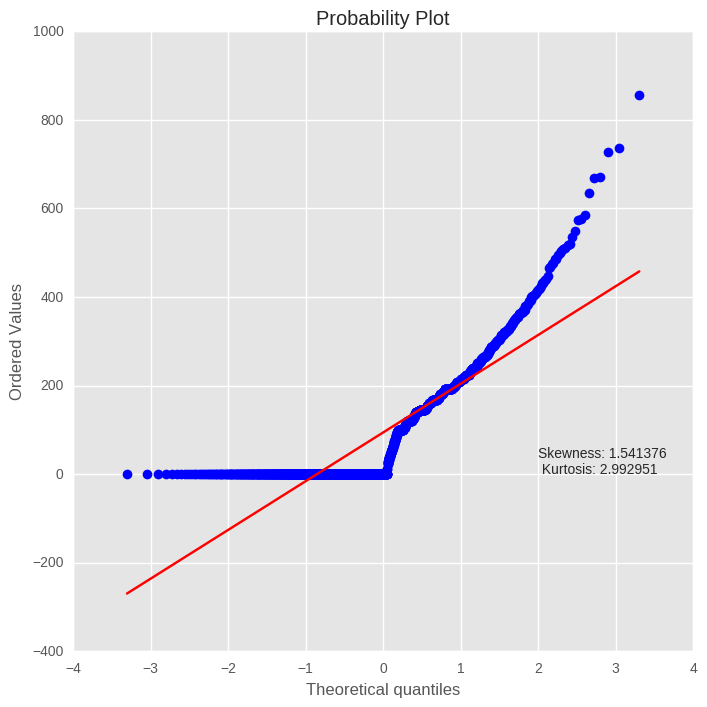

In [34]:
plot_univariate_pp(num, "WoodDeckSF")

It is not an important feature and has many zeros, drop this one.

# OpenPorchSF
Open porch area in square feet.

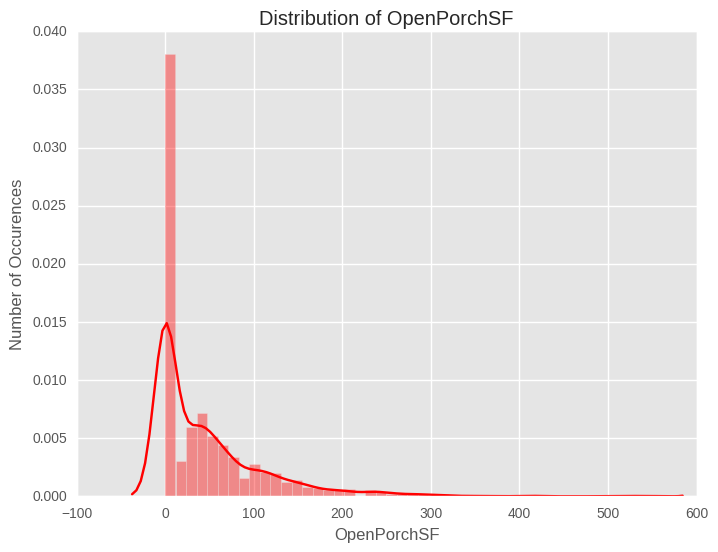

In [35]:
plot_univariate_dist(num, "OpenPorchSF")

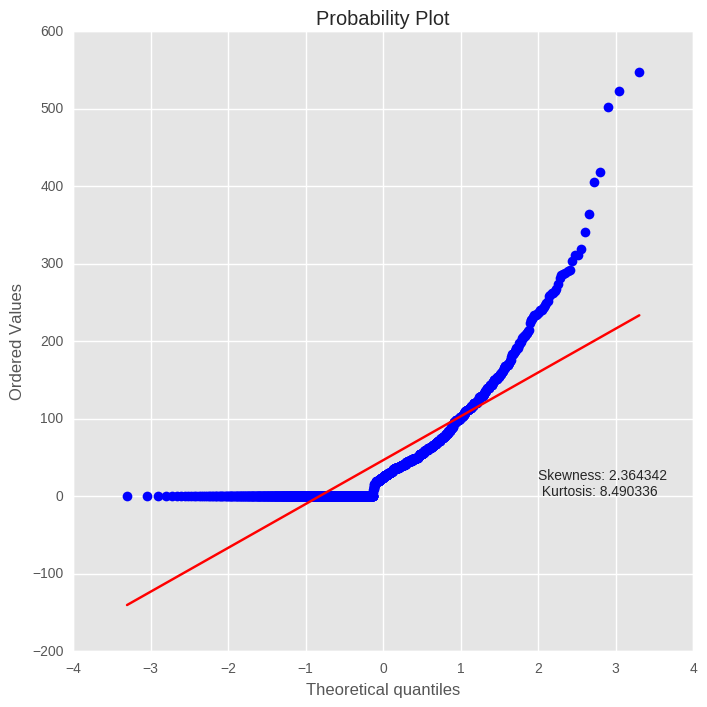

In [36]:
plot_univariate_pp(num, "OpenPorchSF")

# EnclosedPorch
Enclosed porch area in square feet

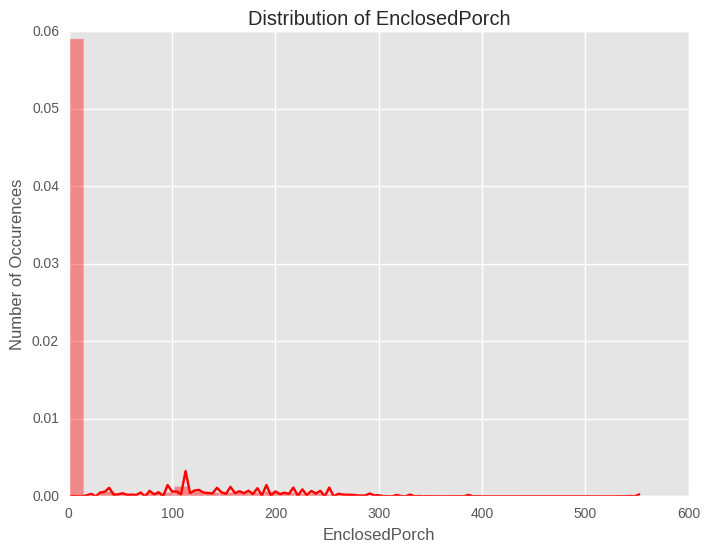

In [37]:
plot_univariate_dist(num, "EnclosedPorch")

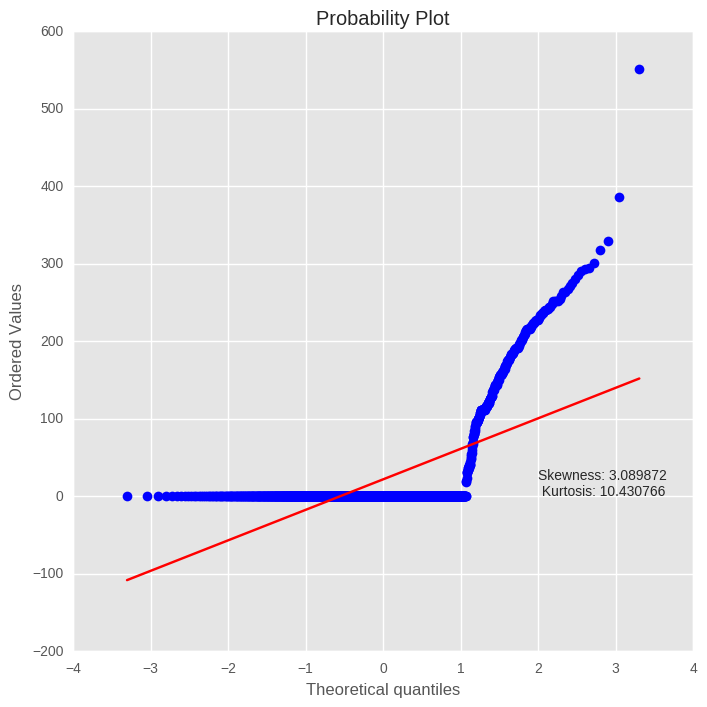

In [38]:
plot_univariate_pp(num, "EnclosedPorch")

From the plot, we can drop this feature.

# 3SsnPorch
Three season porch area in square feet.

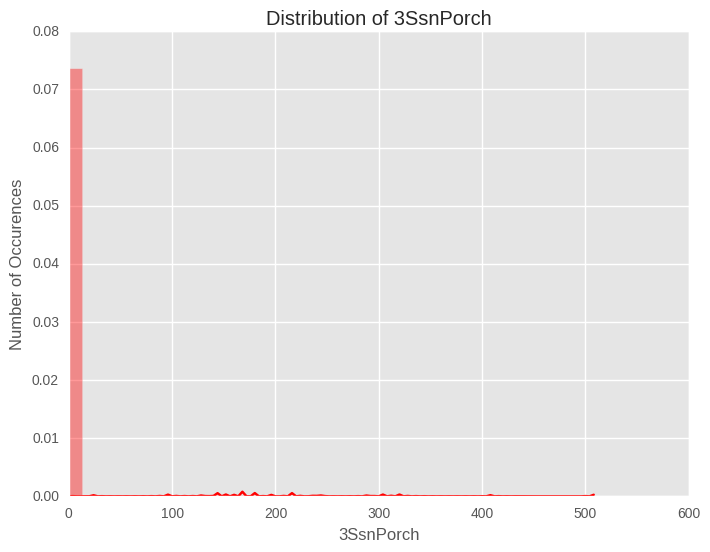

In [39]:
plot_univariate_dist(num, "3SsnPorch")

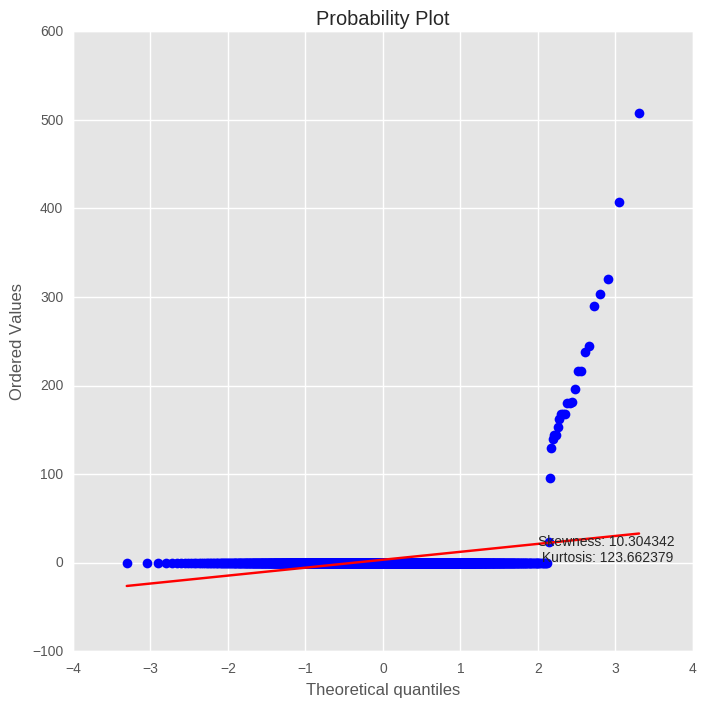

In [40]:
plot_univariate_pp(num, "3SsnPorch")

Drop this one.

# ScreenPorch
Screen porch area in square feet.

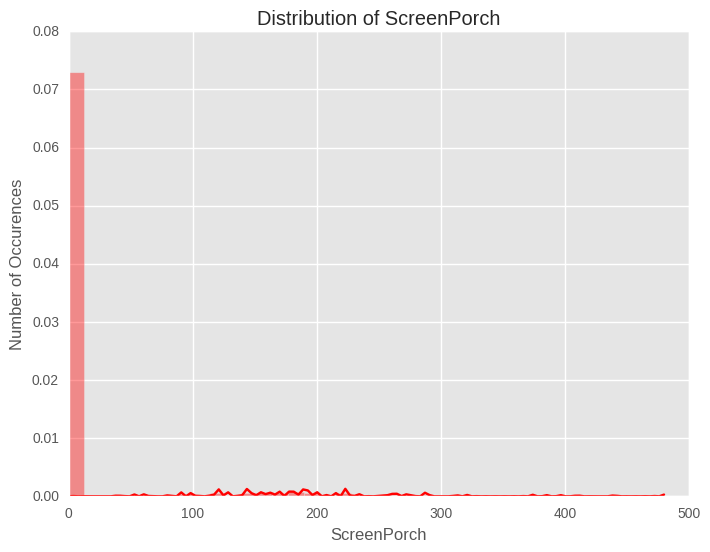

In [41]:
plot_univariate_dist(num, "ScreenPorch")

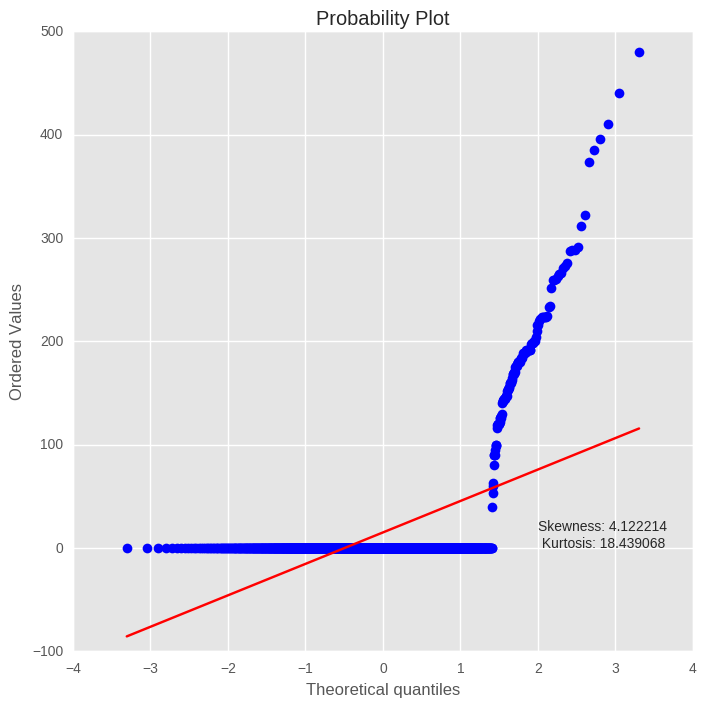

In [42]:
plot_univariate_pp(num, "ScreenPorch")

Drop this feature.

# Porch impression
Overall all features with Porch don't provide information. We can drop all of them.

# LotFrontage
Linear feet of street connected to property.

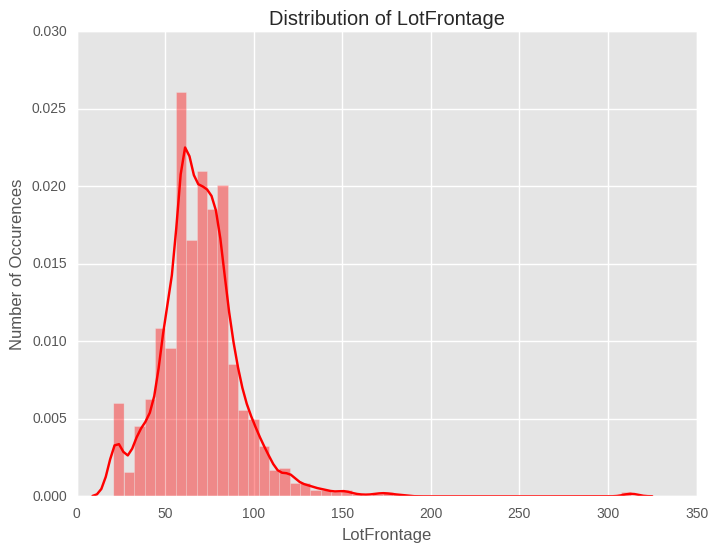

In [43]:
plot_univariate_dist(num, "LotFrontage")

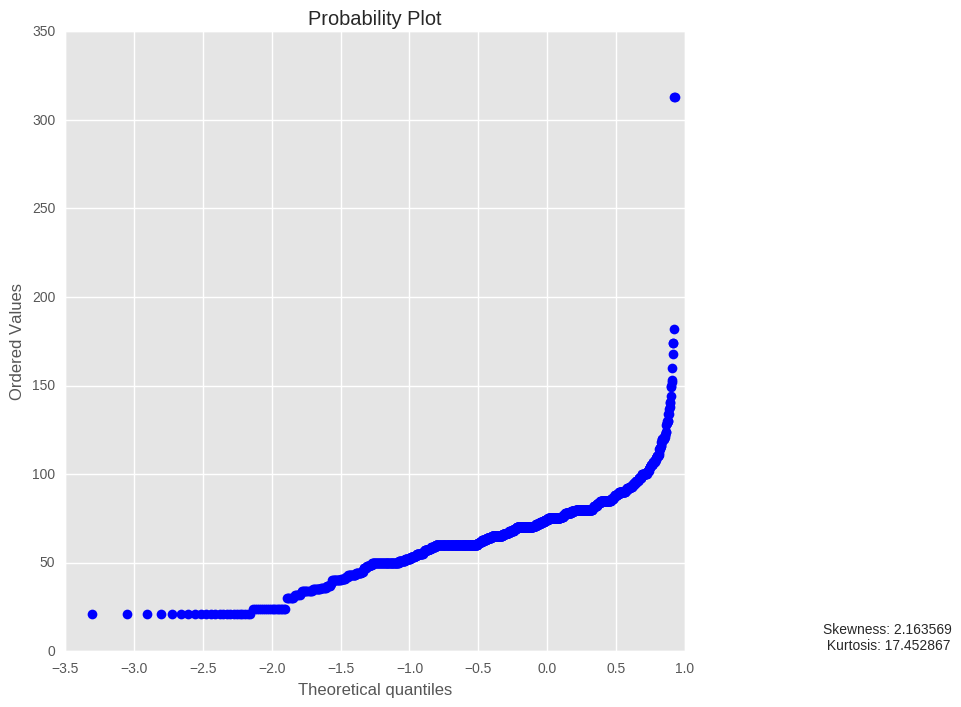

In [44]:
plot_univariate_pp(num, "LotFrontage")

This feature has missing values, and not that important. Consider dropping.

# LotArea
Lot size in square feet.

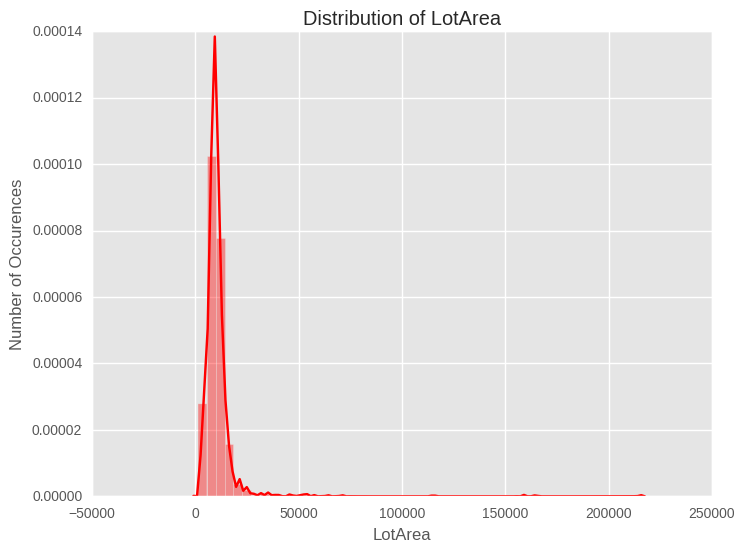

In [45]:
plot_univariate_dist(num, "LotArea")

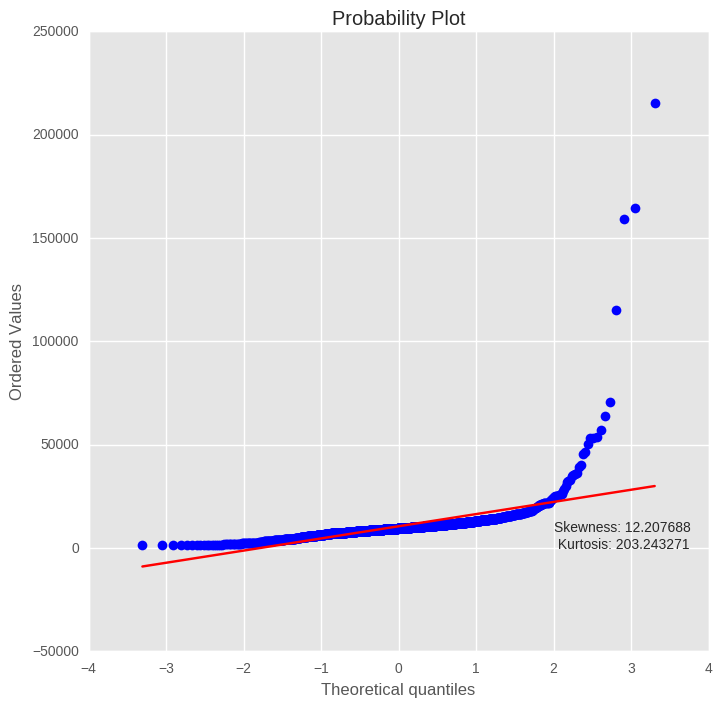

In [46]:
plot_univariate_pp(num, "LotArea")

Not that important, drop it. 

# PoolArea
Pool area in square feet.

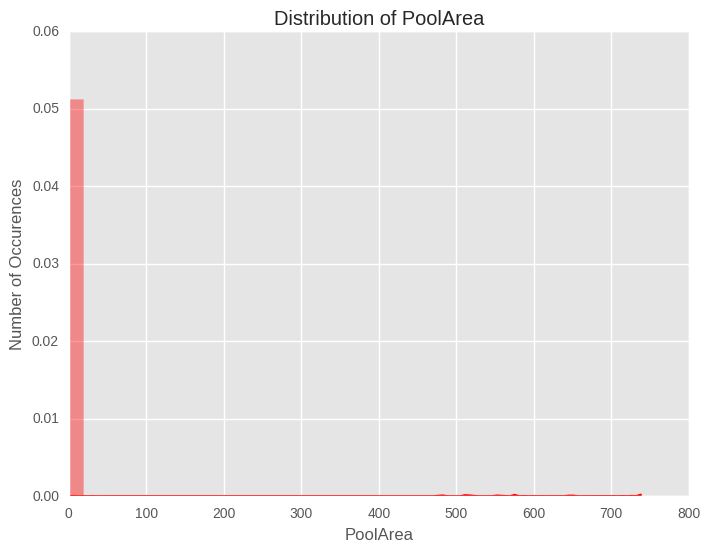

In [47]:
plot_univariate_dist(num, "PoolArea")

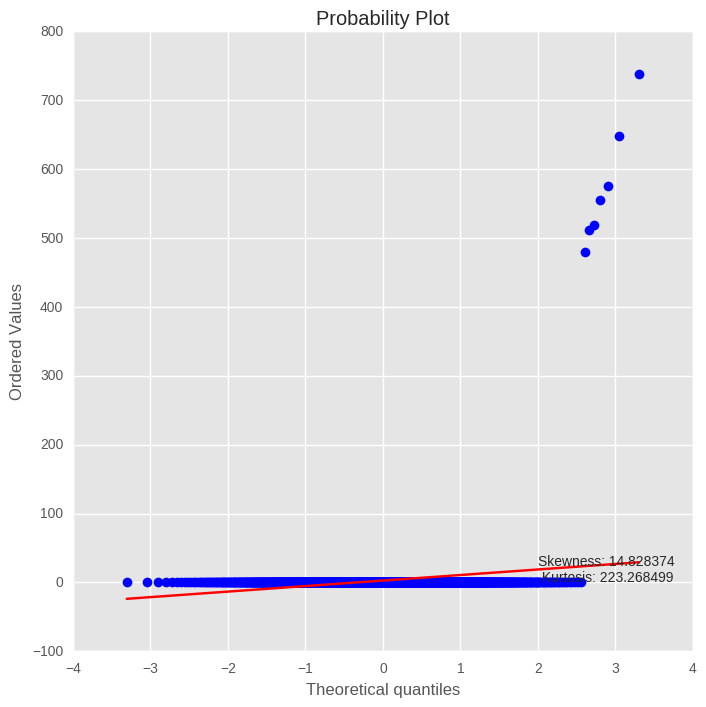

In [48]:
plot_univariate_pp(num, "PoolArea")

Drop this feature.

 # MiscVal
 The value of miscellaneous feature.

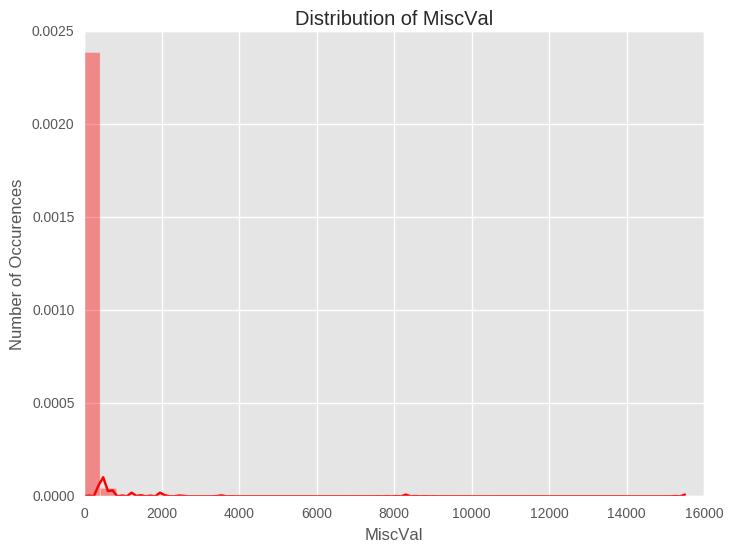

In [49]:
plot_univariate_dist(num, "MiscVal")

Without plotting probability plot, this feature can be dropped.

# LowQualFinSF
Low quality finished square feet, it is narrowly negatively corrolated with price.

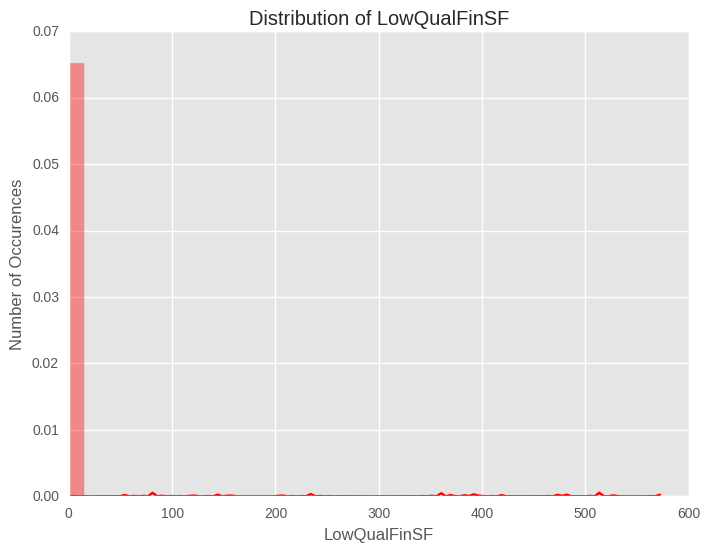

In [50]:
plot_univariate_dist(num, "LowQualFinSF")

We can drop this one.